In [1]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import re
from scipy.stats import pearsonr
from pathlib import Path

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet, cut_tree
from scipy.spatial.distance import pdist
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn import metrics
import sys
sys.setrecursionlimit(10000)
import os

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# final ivt vs native
CBF5GAL = "modification_calls/20190610_R941_CBF5GAL.csv"
CBF5GLU = "modification_calls/20190611_R941_CBF5GLU.csv"
NOP58GAL = "modification_calls/20190617_R941_NOP58GAL.csv"
NOP58GLU = "modification_calls/20190619_R941_NOP58GLU.csv"
IVT = "modification_calls/20191014_R941_IVT.csv"
mutant448 = "modification_calls/20210405_R941_mutant448.csv"
WT_YPD = "modification_calls/20210410_R941_WT_YPD.csv"
WT_KOAC = "modification_calls/20210412_R941_WT_KOAC.csv"
mutant452 = "modification_calls/20210413_R941_mutant452.csv"
WT_CY = "modification_calls/20210414_R941_WT_CY.csv"
mutant451 = "modification_calls/20210415_R941_mutant451.csv"
WT_PB = "modification_calls/20210520_R941_WT_PB.csv"
WT_stationary = "modification_calls/20210521_R941_WT_stationary.csv"
Dbp3d_YPD = "modification_calls/20210527_R941_Dbp3d_YPD.csv"
trl1d_YPD = "modification_calls/20210528_R941_trl1d_YPD.csv"
WT_rapa5 = "modification_calls/20210531_R941_WT_rapa5.csv"
Mix = "modification_calls/20210618_R941_Mix.csv"
prp43 = "modification_calls/20210619_R941_prp43.csv"
MIX_2 = "modification_calls/20210716_R941_MIX.csv"
YS603_18_YEPD = "modification_calls/20210717_R941_YS603_18_YEPD.csv"
prp16_18deg_YPD = "modification_calls/20210719_R941_prp16_18deg_YPD.csv"
spp382_YPD = "modification_calls/20210720_R941_spp382_YPD.csv"
R941_YS602_18_YPD = "modification_calls/20210722_R941_R941_YS602_18_YPD.csv"
dbr1d_YPD = "modification_calls/20210729_R941_dbr1d_YPD.csv"
sqs1d_YPD = "modification_calls/20210730_R941_sqs1d_YPD.csv"
snR4d_YPD = "modification_calls/20210823_R941_snR4d_YPD.csv"
snR45d_YPD = "modification_calls/20210824_R941_snR45d_YPD.csv"
mutant448_2 = "modification_calls/20210825_R941_mutant448.csv"
snR4d_alpha_YPD = "modification_calls/20210902_R941_snR4d_alpha_YPD.csv"

In [3]:
# Depletion plotting
all_file_paths = [CBF5GLU, NOP58GLU, IVT, WT_YPD] 
all_labels = ["CBF5GLU", "NOP58GLU", "IVT", "WT_YPD"] 
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


In [4]:
print(len(vc.get_X("RDN18-1", vc.get_contig_positions("RDN18-1"), label="CBF5GLU")))
print(len(vc.get_X("RDN25-1", vc.get_contig_positions("RDN25-1"), label="CBF5GLU")))
print(len(vc.get_X("RDN18-1", vc.get_contig_positions("RDN18-1"), label="NOP58GLU")))
print(len(vc.get_X("RDN25-1", vc.get_contig_positions("RDN25-1"), label="NOP58GLU")))

488
520
693
934


<IPython.core.display.Javascript object>


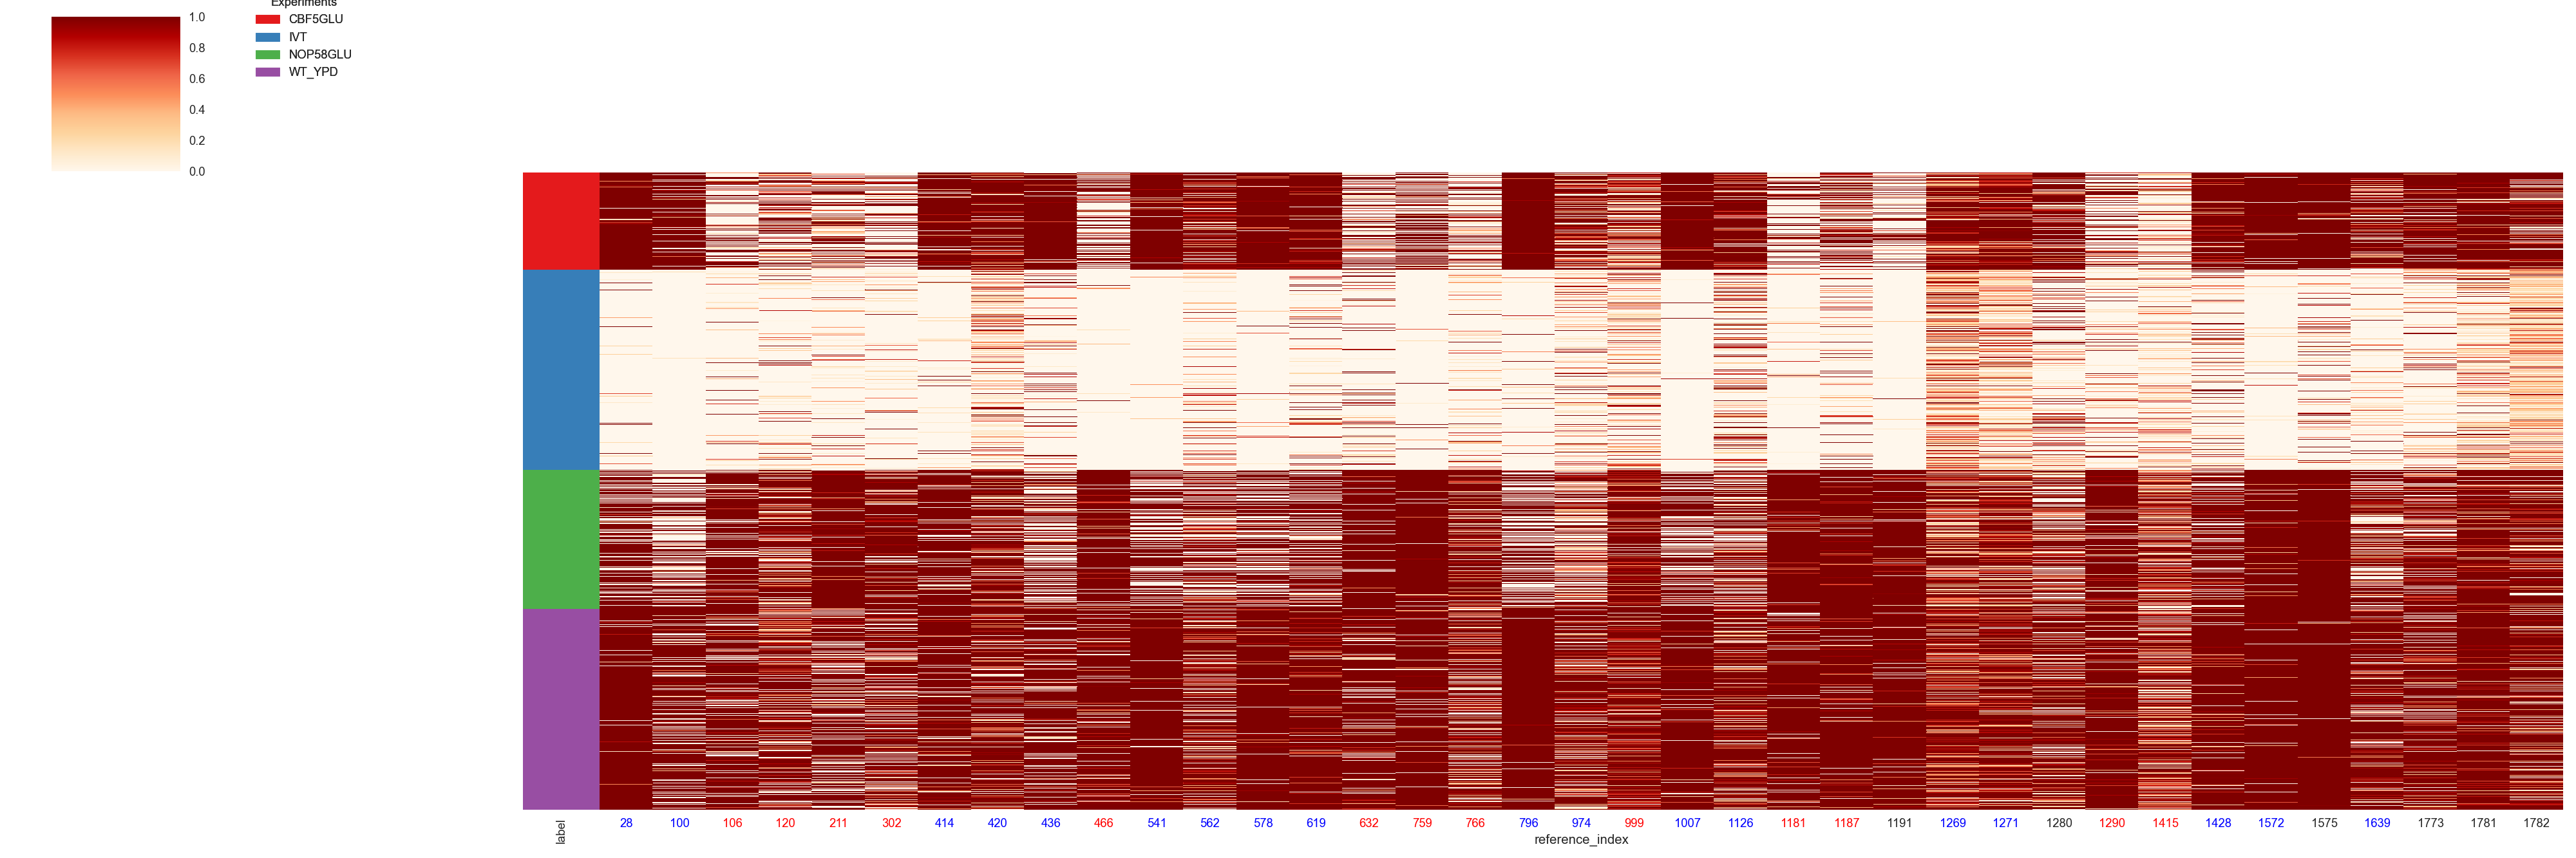

<IPython.core.display.Javascript object>


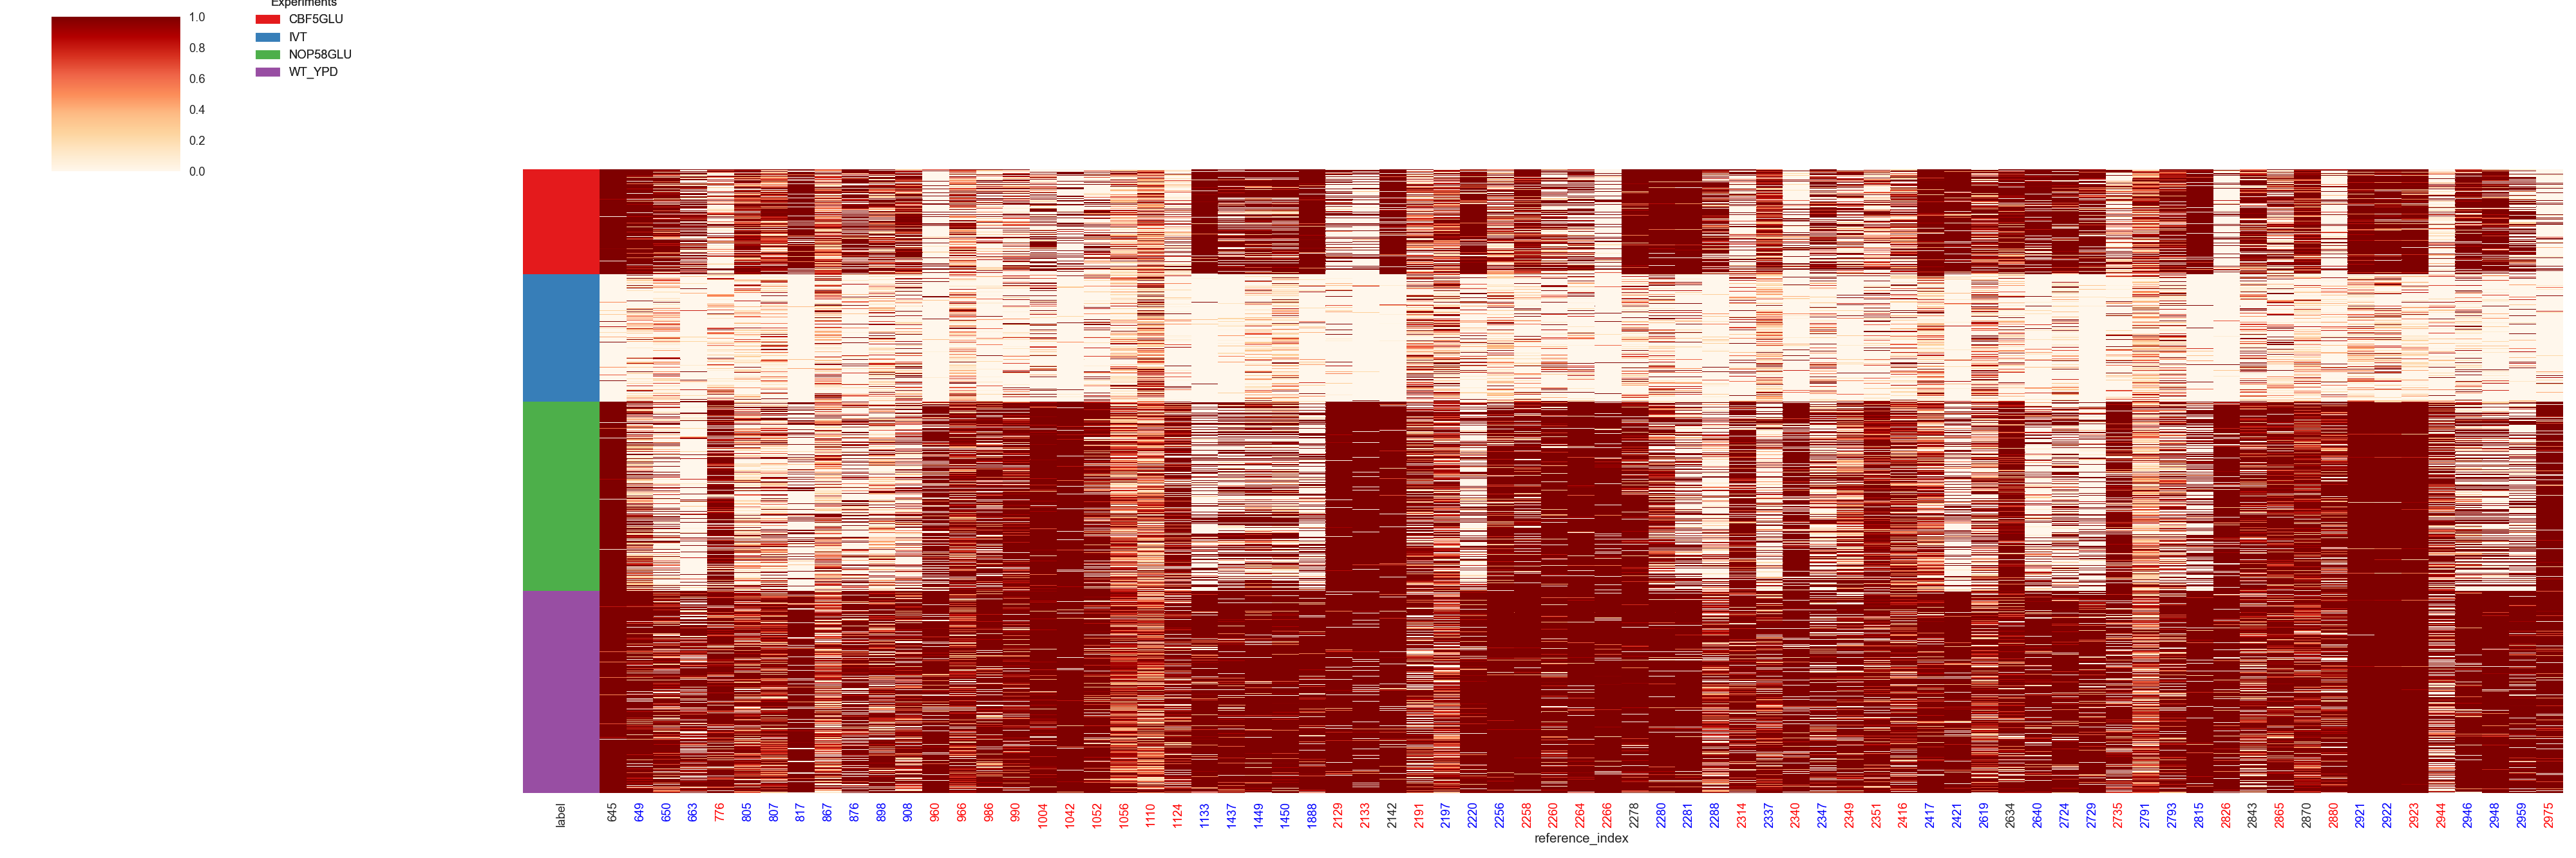

In [4]:
%matplotlib notebook

n = 1000
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"

label = None
contig = 'RDN18-1'
contigs = ['RDN18-1', 'RDN25-1']
Path("figures/depletion_plots").mkdir(parents=True, exist_ok=True)

for contig in contigs:
    save_fig_path = f"figures/depletion_plots/{contig}_depletion_dendrogram.png"
    g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                   metric=metric,
                                   method=method, 
                                   label=label,
                                   col_cluster=False,
                                   row_cluster=True,
                                   twoprimeo_pos=None,
                                   pseduo_u_pos=None,
                                   legend=legend,
                                   figsize=figsize)


<IPython.core.display.Javascript object>


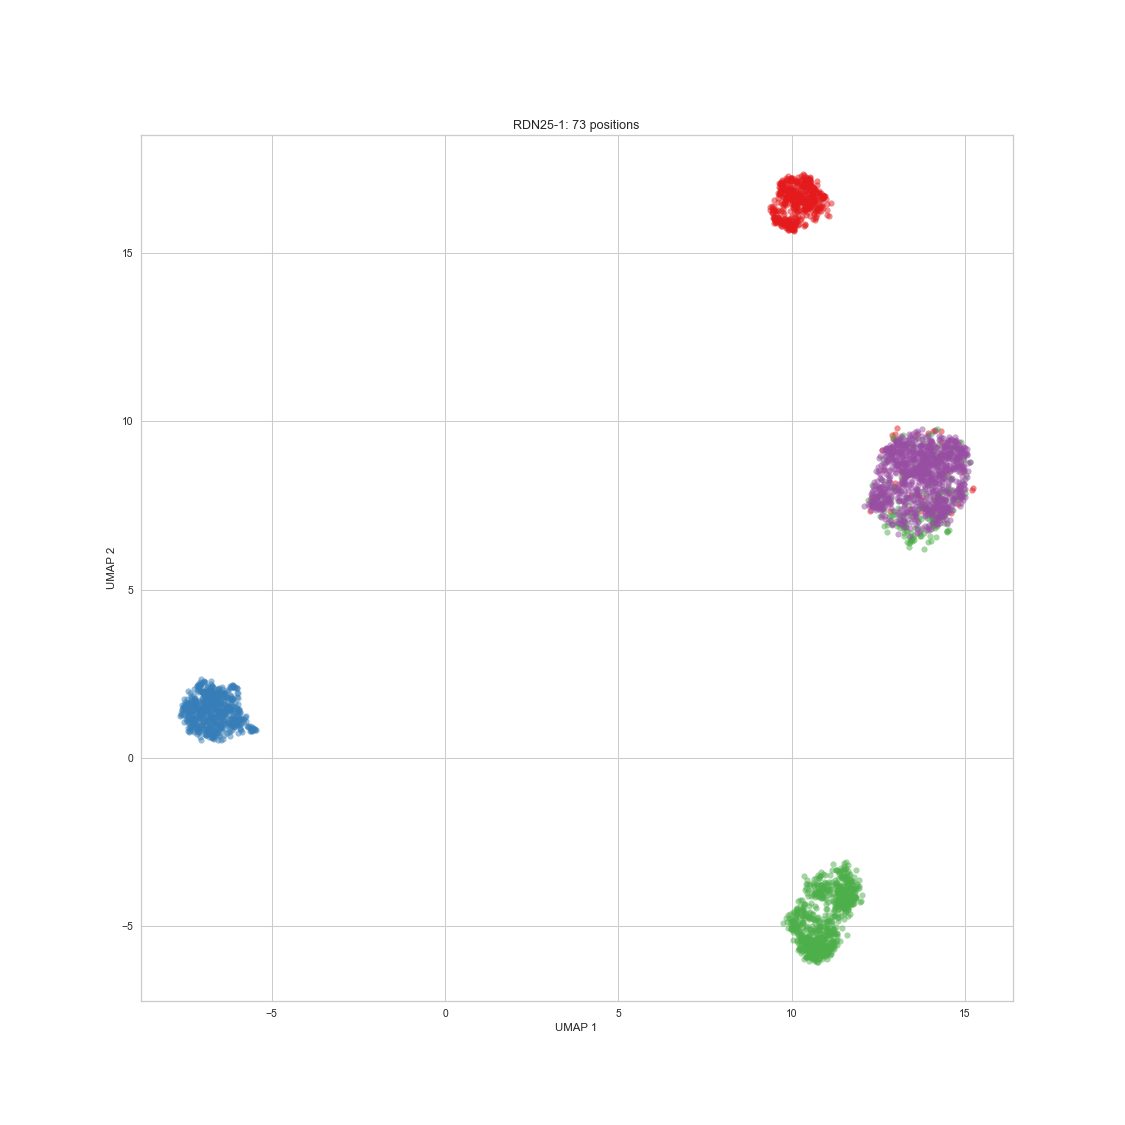

<IPython.core.display.Javascript object>


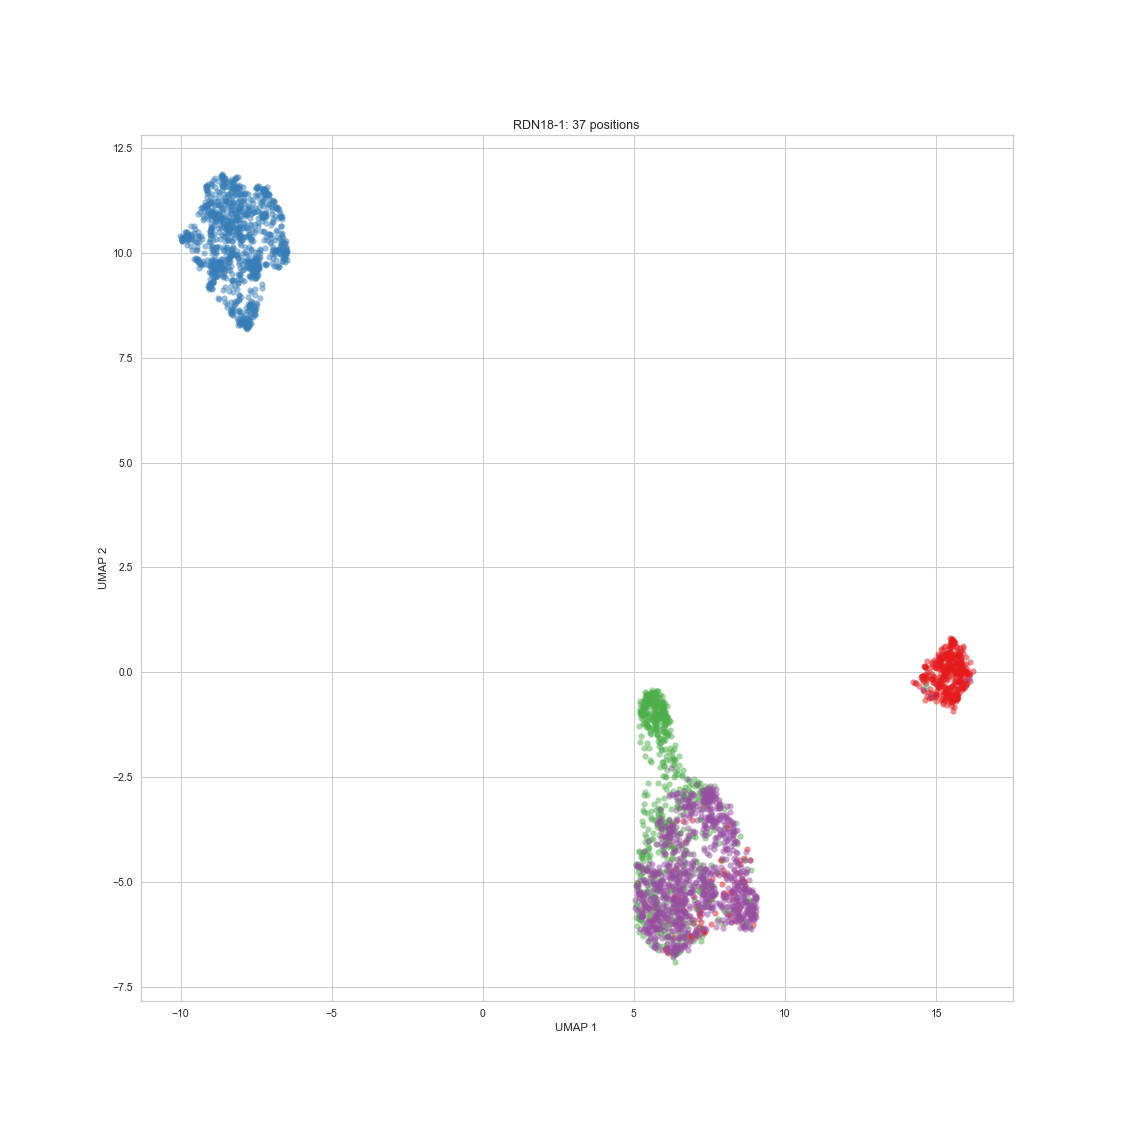

In [22]:
contigs = ["RDN25-1", "RDN18-1"]
for contig in contigs:
    n_components = 2
    n = 1000
    save_fig_path = None
    legend = False
    other_params = {"alpha": 0.5, "s": 30}
    save_fig_path = f"figures/depletion_plots/{contig}_depletion_umap.png"
    # save_fig_path = None
    vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, legend=legend, n=n, **other_params)       

<IPython.core.display.Javascript object>


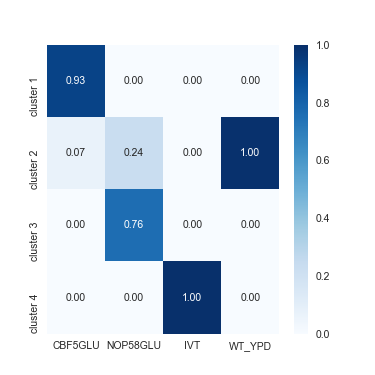

<IPython.core.display.Javascript object>


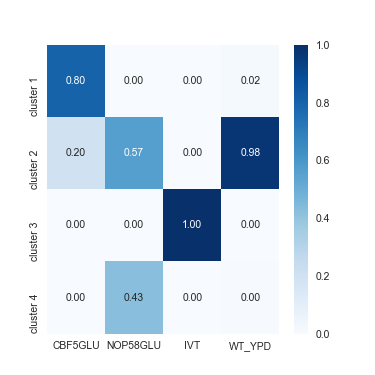

In [23]:
def get_count(count, label):
    if hasattr(count, label):
        return getattr(count, label)
    else:
        return 0

n=1000
n_clusters = 4
contigs = ["RDN25-1", "RDN18-1"]
for contig in contigs:
    X = vc.get_X(contig, vc.get_contig_positions(contig), n=n)
    Z = linkage(X, method=method, metric=metric)
    cut = cut_tree(Z, n_clusters=n_clusters)
    clusters = np.array([x[0]+1 for x in cut])
    plot_me = []
    for i in range(1, 5):
        cluster_counts = []
        counts = X[clusters == i].index.get_level_values(1).value_counts()
        for label in all_labels:
            cluster_counts.append(get_count(counts, label))
        plot_me.append(cluster_counts)
    data = pd.DataFrame(plot_me, columns=all_labels, index=[f"cluster {i}" for i in range(1, 5)])
    # plot
    f, ax = plt.subplots(figsize=(5, 5))
    figure_path = None
#     figure_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/percent_depletion/{contig}_depletion_fraction.svg"
    figure_path = f"figures/depletion_plots/{contig}_depletion_fraction.svg"

    percents = (data / data.sum())
    ax = sns.heatmap(percents, cmap="Blues", annot=True, fmt=".2f", vmin=0, vmax=1)

    if figure_path is not None:
#         assert not os.path.exists(figure_path), "Save fig path does exist: {}".format(figure_path)
        plt.savefig(figure_path, dpi=1000)
    else:
        plt.show()

# correlation stats

In [10]:
pseduo_u_pos = [775, 959, 965, 985, 989, 1003, 1041, 1051, 1055, 1109, 1123,
                     2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
                     2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974, 105, 119, 210, 301, 465, 631, 758, 765,
                     998, 1180, 1186,
                     1289, 1414]
twoprimeo_pos = [648, 649, 662, 804, 806, 816, 866, 875, 897, 907, 1132,
                      1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
                      2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
                      2921, 2945, 2947, 2958, 27, 99, 413, 419, 435, 540, 561, 577, 618, 795, 973,
                      1006, 1125, 1268, 1270, 1427, 1571, 1638]


In [12]:
from scipy.stats import combine_pvalues
correlation_data = pd.read_csv("figures/summary_data/all_experiment_correlations_corrected_pvalues.csv", index_col=0)
twoprimeo_pvalues = []
other_pvalues = []
for index in range(len(correlation_data)):
    data = correlation_data.iloc[index]
    ref_index1 = data["ref_index1"]-1
    ref_index2 = data["ref_index2"]-1
    if ref_index1 in twoprimeo_pos and ref_index2 in twoprimeo_pos:
        twoprimeo_pvalues.append(correlation_data["NOP58GLU_corrected_wt_comparison_pvalue"].iloc[index])
    else:
        other_pvalues.append(correlation_data["NOP58GLU_corrected_wt_comparison_pvalue"].iloc[index])

statistic, pvalue = combine_pvalues(twoprimeo_pvalues)
print(statistic, pvalue)
statistic, pvalue = combine_pvalues(other_pvalues)
print(statistic, pvalue)

pseudou_pvalues = []
other_pvalues = []
for index in range(len(correlation_data)):
    data = correlation_data.iloc[index]
    ref_index1 = data["ref_index1"]-1
    ref_index2 = data["ref_index2"]-1
    if ref_index1 in pseduo_u_pos and ref_index2 in pseduo_u_pos:
        pseudou_pvalues.append(correlation_data["CBF5GLU_corrected_wt_comparison_pvalue"].iloc[index])
    else:
        other_pvalues.append(correlation_data["CBF5GLU_corrected_wt_comparison_pvalue"].iloc[index])

statistic, pvalue = combine_pvalues(pseudou_pvalues)
print(statistic, pvalue)
statistic, pvalue = combine_pvalues(other_pvalues)
print(statistic, pvalue)

14397.563113979886 0.0
4545.713964554336 0.9999849487657706
2616.795356503617 1.6401654564608985e-139
3181.443371800977 1.0


In [14]:
twoprimeo_pvalues = []
other_pvalues = []
for index in range(len(correlation_data)):
    data = correlation_data.iloc[index]
    ref_index1 = data["ref_index1"]-1
    ref_index2 = data["ref_index2"]-1
    if ref_index1 in [1772, 1279] and ref_index2 in twoprimeo_pos:
        twoprimeo_pvalues.append(correlation_data["NOP58GLU_corrected_wt_comparison_pvalue"].iloc[index])

statistic, pvalue = combine_pvalues(twoprimeo_pvalues)
print(statistic, pvalue)


36.642381242082536 2.0673194815087986e-06
18906.634697292142 0.0


In [6]:
chi2_pvalues_df = pd.read_csv("figures/summary_data/all_experiment_percent_modification_corrected_pvalues_chi2.csv", 
                                   index_col=0)


In [7]:
chi2_pvalues_df["NOP58GLU_corrected_pvalue"][1280]

9.781045554390092e-16

In [8]:
chi2_pvalues_df["NOP58GLU_corrected_pvalue"][1773]

7.276302170999021e-10